# 7.2 Exercise (7-1, 8-1, 8-2)
http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

## Exercise 7-1
Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot
percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations.
How would you characterize the relationship between these variables?

In [113]:
import nsfg
import thinkstats2
import thinkplot
import numpy as np
import matplotlib.pyplot as plt
import scipy

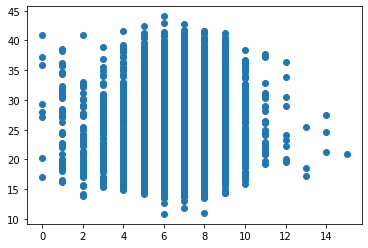

In [12]:
# makes data frame with preg info
df = nsfg.ReadFemPreg()
# variables for weight and age
wgt, age = df['birthwgt_lb'], df['agepreg']
# creates scatter plot of birth weight vs mother's age
plt.scatter(wgt, age)

In [13]:
# fill nan's with mean
wgt_filled = wgt.fillna(wgt.mean())
age_filled = age.fillna(age.mean())

In [43]:
# computing pearson's corr using scipy
scipy.stats.pearsonr(wgt_filled, age_filled)

(0.054629408893966266, 1.8492758220101364e-10)

In [44]:
# computing spearman's corr with scipy
scipy.stats.spearmanr(wgt_filled, age_filled)

SpearmanrResult(correlation=0.08908578395968408, pvalue=2.3239851214880947e-25)

There is slight positive correlation between the baby's weight and mother's age. Given spearman's correlation being higher than pearson's, that suggests that the relationship may be nonlinear or that the distribution of one of the variables is skewed.

## Exercise 8-1
In this chapter we used x¯ and median to estimate μ, and found that x¯ yields lower MSE.
Also, we used S2 and Sn-1
2 to estimate σ, and found that S2 is biased and Sn-1
2 is unbiased.
Run similar experiments to see if x¯ and median are biased estimates of μ. Also check
whether S2 or Sn-1
2 yields a lower MSE.

In [5]:
import random
import math

In [6]:
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

In [7]:
def MSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    return np.mean(e2)

In [8]:
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [64]:
def Estimate(n=7, m=1000000):
    mu = 0
    sigma = 1
    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
    means_me= MeanError(means, mu)
    median_me = MeanError(medians, mu)
    print(means_me, median_me)

In [65]:
Estimate()

0.00034144211366639413 0.0009039887101259341


Both xbar and median Mean Error decrease as m increases, so the estimators are likely not biased

In [93]:
def Estimate2(n=7, m=1000):
    mu = 0
    sigma = 1
    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)
        print('mse biased variance', MSE(estimates1, mu))
        print('mse unbiased variance', MSE(estimates2, mu))

In [94]:
Estimate2()

mse biased variance 0.26383928622602026
mse unbiased variance 0.35911458402986085
mse biased variance 0.3864616651081855
mse unbiased variance 0.5260172663972525
mse biased variance 0.45456810039553774
mse unbiased variance 0.6187176922050376
mse biased variance 0.3986785551189017
mse unbiased variance 0.5426458111340607
mse biased variance 0.387956313989275
mse unbiased variance 0.5280516495965133
mse biased variance 0.6122792137060719
mse unbiased variance 0.8333800408777091
mse biased variance 0.6916019268978432
mse unbiased variance 0.941347067166509
mse biased variance 0.8756606563682034
mse unbiased variance 1.1918714489456104
mse biased variance 0.8485280967623606
mse unbiased variance 1.1549410205932131
mse biased variance 0.8823014960542395
mse unbiased variance 1.2009103696293815
mse biased variance 0.8956745893632913
mse unbiased variance 1.2191126355222577
mse biased variance 0.8394077046168852
mse unbiased variance 1.1425271535063162
mse biased variance 0.795014606291197
m

mse biased variance 0.9604538348969043
mse unbiased variance 1.307284386387453
mse biased variance 0.9619861744239218
mse unbiased variance 1.3093700707436715
mse biased variance 0.9624278433819383
mse unbiased variance 1.3099712312698606
mse biased variance 0.9645954482391026
mse unbiased variance 1.3129215823254452
mse biased variance 0.9627677581365426
mse unbiased variance 1.310433893019183
mse biased variance 0.9650717419124865
mse unbiased variance 1.3135698709364398
mse biased variance 0.9633319418101881
mse unbiased variance 1.3112018096860891
mse biased variance 0.9628020182761736
mse unbiased variance 1.310480524875903
mse biased variance 0.9607478190331938
mse unbiased variance 1.3076845314618473
mse biased variance 0.9594481348063613
mse unbiased variance 1.3059155168197694
mse biased variance 0.9586569780253149
mse unbiased variance 1.304838664534456
mse biased variance 0.956541727755104
mse unbiased variance 1.3019595738888914
mse biased variance 0.9544605371753372
mse un

mse unbiased variance 1.2874756163532126
mse biased variance 0.9457982104662196
mse unbiased variance 1.2873364531345766
mse biased variance 0.9451285034021311
mse unbiased variance 1.2864249074084564
mse biased variance 0.9441560605024673
mse unbiased variance 1.2851013045728028
mse biased variance 0.9464743141885463
mse unbiased variance 1.2882567054232992
mse biased variance 0.9451712008326505
mse unbiased variance 1.2864830233555522
mse biased variance 0.9441012581613015
mse unbiased variance 1.285026712497327
mse biased variance 0.9430509628754068
mse unbiased variance 1.2835971439137484
mse biased variance 0.9417051412042993
mse unbiased variance 1.2817653310836297
mse biased variance 0.9427143474308491
mse unbiased variance 1.2831389728919893
mse biased variance 0.9420067248430123
mse unbiased variance 1.2821758199252111
mse biased variance 0.9424834997641786
mse unbiased variance 1.2828247635679098
mse biased variance 0.941947641479956
mse unbiased variance 1.2820954009032737
m

mse biased variance 0.9706581062406558
mse unbiased variance 1.3211735334942263
mse biased variance 0.9703764909687502
mse unbiased variance 1.3207902238185765
mse biased variance 0.9694168363953978
mse unbiased variance 1.319484027315958
mse biased variance 0.9686746799422523
mse unbiased variance 1.318473869921399
mse biased variance 0.967684854457867
mse unbiased variance 1.3171266074565413
mse biased variance 0.9704479727188418
mse unbiased variance 1.320887518422868
mse biased variance 0.970050791137452
mse unbiased variance 1.3203469101593095
mse biased variance 0.9699764862736501
mse unbiased variance 1.3202457729835795
mse biased variance 0.9689254023619663
mse unbiased variance 1.3188151309926766
mse biased variance 0.9686269648371144
mse unbiased variance 1.318408924361628
mse biased variance 0.9679092805063886
mse unbiased variance 1.3174320762448068
mse biased variance 0.9669657989963585
mse unbiased variance 1.316147893078377
mse biased variance 0.96603577059633
mse unbias

mse biased variance 0.9458630163861116
mse unbiased variance 1.2874246611922073
mse biased variance 0.9456417936306997
mse unbiased variance 1.2871235524417857
mse biased variance 0.9448629240164311
mse unbiased variance 1.286063424355698
mse biased variance 0.9443824866961066
mse unbiased variance 1.2854094957808118
mse biased variance 0.9437528661424229
mse unbiased variance 1.284552512249409


The biased estimator of variance has a lower Mean Squared Error than the unbiased estimator

## Exercise 8-2
Suppose that you draw a sample with size n = 10 from an exponential distribution with
λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the
estimate L. Compute the standard error of the estimate and the 90% confidence interval.
Repeat the experiment with a few different values of n and make a plot of standard error
versus n.

In [385]:
def SimulateSample(lam=2, n=10, m=1000):
    estimates = []
    for j in range(m):
        xs = np.random.exponential(1/lam, n)
        lamhat = 1/np.mean(xs)
        estimates.append(lamhat)
    stderr = RMSE(estimates, lam)
    print('standard error', stderr)
    count, bins_count = np.histogram(estimates, bins = 20)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    ci = np.percentile(estimates, 5), np.percentile(estimates, 95)
    print('confidence interval', ci)
    stderr_cdf = stderr, cdf, bins_count
    return stderr_cdf

standard error 0.811630898513736
confidence interval (1.287848387917312, 3.7599994320631764)


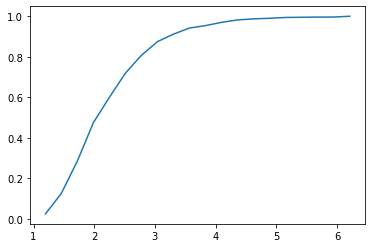

In [386]:
answer = SimulateSample()
plt.plot(answer[2][1:], answer[1], label ='CDF')

standard error 0.805390535183197
confidence interval (0.40955, 0.9991)
standard error 0.2068474743189051
confidence interval (0.05835, 0.9946)
standard error 0.06285645875916672
confidence interval (0.014550000000000002, 0.9991000000000001)


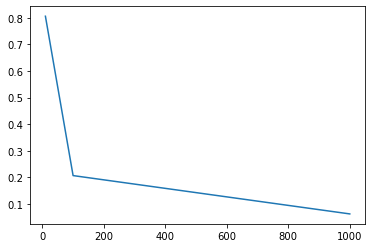

In [123]:
# dictionary to store standard errors according to key, n
stderr_dict = {}
n = 10
while n <= 1000:
    # stores result of simulation
    result = SimulateSample(n = n)
    # adds standard error to dictionary with key, n
    stderr_dict[n]= result[0]
    # increase size of sample by a factor of 10
    n*= 10
# sort dictionary into a list
lst = sorted(stderr_dict.items())
# unzip tuples in list into separate variables, standard error and n
x, y = zip(*lst)
# plot standard error against n
plt.plot(x, y)
plt.show()

As n increases, the standard error goes down